 <H1> <span style="color:blue;"><B>PROYECTO EDA</span></h1>

 <H2> <span style="color:orange;"><B>¿La pandemia nos cambió?</span></h2>

### Hábitos de reciclaje después de la pandemia.
#### Quiero centrarme en los 4 elementos que más habituados estamos al reciclaje: **Vidrio, Papel y cartón, plástico y orgánico**.





<h3><u>1. Importación de librerias</u></h3>

### Archivo obtenido del Ayuntamiento de Donostia.

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


<h3><u>2. Carga del Dataset</u></h3>

Se han realizado algunos cambios utilizando PowerQuery, ya que la tabla obtenida en la página de [datos.gob.es](www.datos.gob.es) no mostraba de forma correcta los datos para su lectura y estudio.

In [80]:
df = pd.read_csv("Residuos.csv")


<h3><u>3. Preparación de la tabla</u></h3>

In [81]:
df =df.rename(columns={"Tipo de recogida":"Tipo"})

In [82]:
#Se van a eliminar algunas columnas que están en Euskera, ya que la presentación 
#se realizará en castellano.
df=df.drop(["Bilketa mota","Sailkapena","Azpisailkapena","Eremua"], axis=1)


In [ ]:
df.info()


<h3><u>4. Preparación de gráficos</u></h3>

<h4> <span style="color:orange;"><B>4.1 Gráfico de Residuos de Papel y Cartón en ámbitos Urbanos</span></h4>

#### Se realiza un nuevo dataframe con la información que queremos visualizar; en este caso se trata de residuos de papel y cartón en el ámbito urbano. Además se sumará el total de kg para realizar más adelante una comparativa.


In [69]:
#Creamos una dataset para visualizar los datos por Clasificación "Orgánica" en la ámbito urbano.
df_organica = df.query("Clasificación =='Papel/cartón' and Ambito=='URBANO'")
df_organica_t = df_organica.groupby("Año")["Total (kg)"].sum()
df_organica_t=df_organica_t.reset_index()


Realización del gráfico de barras.

<function matplotlib.pyplot.show(close=None, block=None)>

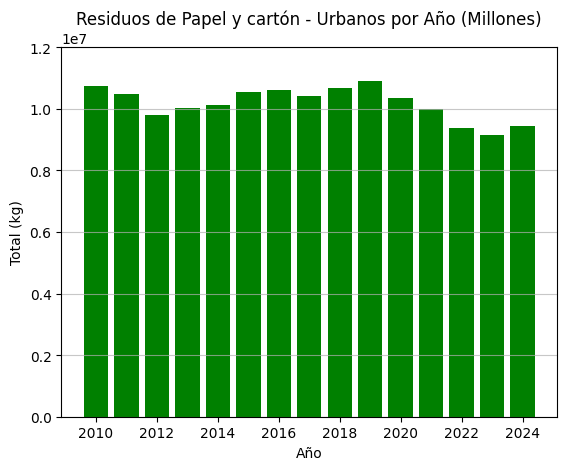

In [70]:
plt.bar(df_organica_t["Año"], df_organica_t["Total (kg)"], color="green")
plt.ylim(0, 12000000)
plt.title("Residuos de Papel y cartón - Urbanos por Año (Millones)")
plt.ylabel("Total (kg)")
plt.xlabel("Año")
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show


Cálculo del Total Kg de Residuos de papel y cartón en el ámbito urbano.

In [71]:
#Cálculo del total
Total_Residuos_Urbanos=df_organica_t["Total_Residuos(kg)"]=df_organica["Total (kg)"].sum()
Total_Residuos_Urbanos

np.float64(152573585.0)

In [72]:
#Cálculo del último año 2024
Total_Residuos_Urbanos=df_organica_t[df_organica_t["Año"]==2024]["Total (kg)"].sum()
Total_Residuos_Urbanos

np.float64(9428711.0)

Creación del DataFrame para el ámbito Industrial.

In [73]:
df_organica_i = df.query("Clasificación =='Papel/cartón' and Ambito=='INDUSTRIAL'")
df_organica_it = df_organica_i.groupby("Año")["Total (kg)"].sum()
df_organica_it=df_organica_it.reset_index()



Creación del gráfico de barras.

<function matplotlib.pyplot.show(close=None, block=None)>

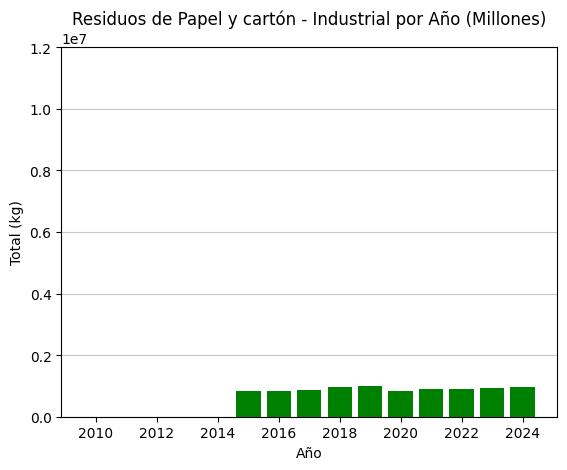

In [74]:
plt.bar(df_organica_it["Año"], df_organica_it["Total (kg)"], color="green")
plt.ylim(0, 12000000)
plt.title("Residuos de Papel y cartón - Industrial por Año (Millones)")
plt.ylabel("Total (kg)")
plt.xlabel("Año")
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show

<h4> <span style="color:orange;"><B>4.2 Gráfico de Residuos de vidrio</span></h4>

In [15]:
df

,Año,Tipo,Clasificación,Subclasificación,Ambito,Total (kg)
0,2010,Autocompostaje,Autocompostaje,Autocompostaje,NaN,325099.0
1,2010,Recogida selectiva,Orgánica,Contenedores via pública,URBANO,310340.0
2,2010,Recogida selectiva,Orgánica,Otros productores (Merkabugati),URBANO,0.0
3,2010,Recogida selectiva,Orgánica,Recogida comercial e industrial,INDUSTRIAL,0.0
4,2010,Recogida selectiva,Papel/cartón,Contenedores vía pública. Recogida lateral,URBANO,7517285.0
...,...,...,...,...,...,...
867,2024,Rechazo,Rechazo,Recogida comercial e industrial (inerte),INDUSTRIAL,156080.0
868,2024,Rechazo,Rechazo,Asentamiento incontrolado,URBANO,0.0
869,2024,Rechazo,Limpieza viaria,Limpieza viaria ayuntamiento,URBANO,2245860.0
870,2024,Rechazo,Limpieza viaria,Limpieza playas,URBANO,359900.0


In [22]:
df_vidrio= df.query("Clasificación =='Vidrio' and Tipo=='Recogida selectiva'")
df_vidrio_t = df_vidrio.groupby("Año")["Total (kg)"].sum()
df_vidrio_it=df_vidrio_t.reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

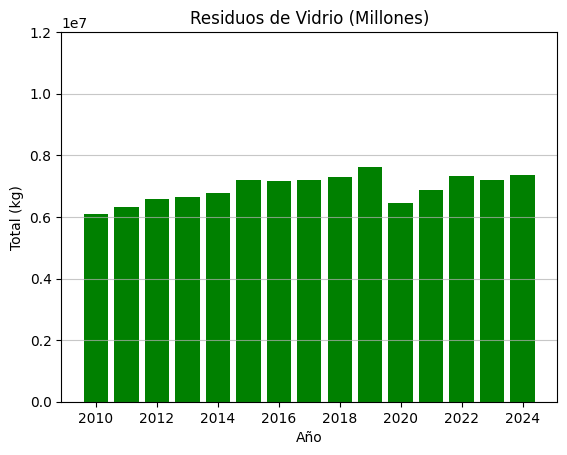

In [20]:
plt.bar(df_vidrio_it["Año"], df_vidrio_it["Total (kg)"], color="green")
plt.ylim(0, 12000000)
plt.title("Residuos de Vidrio (Millones)")
plt.ylabel("Total (kg)")
plt.xlabel("Año")
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show

<h4> <span style="color:orange;"><B>4.3 Gráfico de Residuos de plástico</span></h4>

In [25]:
df_plastico= df.query("Clasificación =='Plásticos' and Tipo=='Recogida selectiva'")
df_plastico_t = df_plastico.groupby("Año")["Total (kg)"].sum()
df_plastico_it=df_plastico_t.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

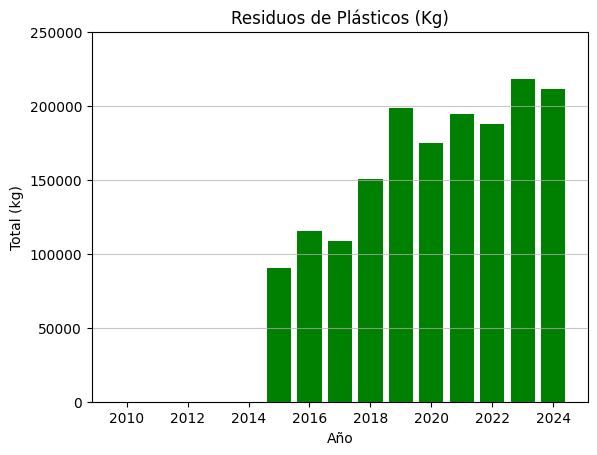

In [33]:
plt.bar(df_plastico_it["Año"], df_plastico_it["Total (kg)"], color="green")
plt.ylim(0, 250000)
plt.title("Residuos de Plásticos (Kg)")
plt.ylabel("Total (kg)")
plt.xlabel("Año")
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show

<h4> <span style="color:orange;"><B>4.3 Autocompostaje</span></h4>

En este primer gráfico vamos a ver la tendencia del uso del Autocompostaje.

In [44]:
df_recogida_au = df.query("Subclasificación == 'Autocompostaje'")
df_recogida_auc = df_recogida_au.groupby("Año")["Total (kg)"].sum()
df_recogida_auc=df_recogida_auc.reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

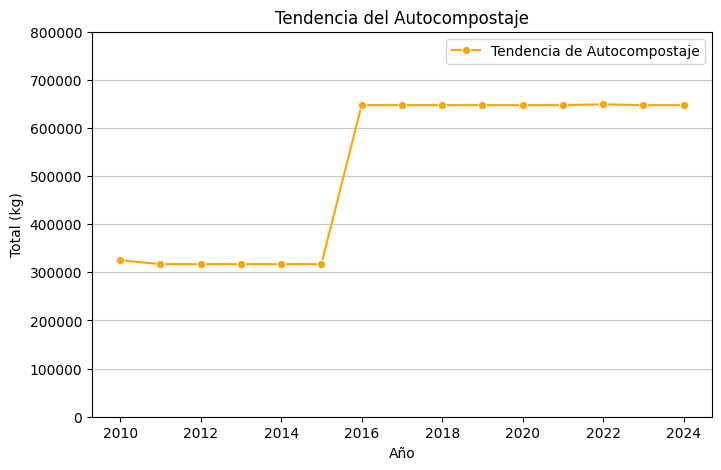

In [116]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_recogida_auc, x="Año", y="Total (kg)", marker="o", color="Orange", label="Tendencia de Autocompostaje")
plt.ylim(0, 800000)
plt.title("Tendencia del Autocompostaje")
plt.ylabel("Total (kg)")
plt.xlabel("Año")
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show

En este segundo gráfico vemos el total de residuos orgánicos recogidos, tanto urbanos como industriales.


In [43]:
df_organica = df.query("Tipo == 'Recogida selectiva' and Clasificación =='Orgánica'")
df_organica_o = df_organica.groupby("Año")["Total (kg)"].sum()
df_organica_o=df_organica_o.reset_index()
df_organica_o

,Año,Total (kg)
0,2010,310340.0
1,2011,513494.0
2,2012,770690.0
3,2013,880360.0
4,2014,2397960.0
5,2015,5143710.0
6,2016,5240025.0
7,2017,5234598.0
8,2018,5521802.0
9,2019,5839634.0


<function matplotlib.pyplot.show(close=None, block=None)>

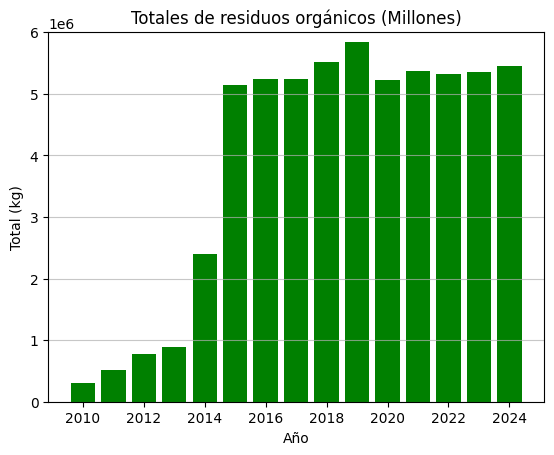

In [42]:

plt.bar(df_organica_o["Año"], df_organica_o["Total (kg)"], color="green")
plt.ylim(0, 6000000)
plt.title("Totales de residuos orgánicos (Millones)")
plt.ylabel("Total (kg)")
plt.xlabel("Año")
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

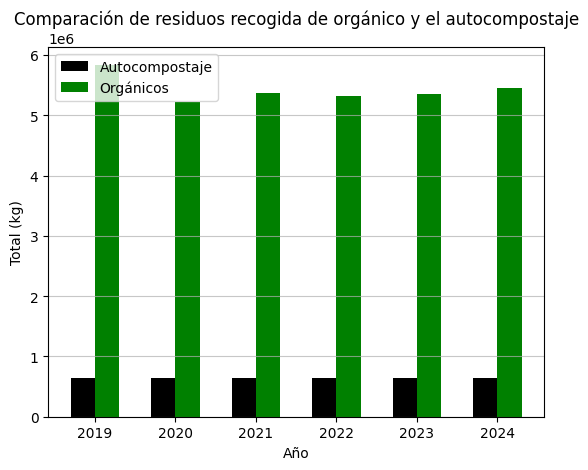

In [ ]:
df_combinado_residuos_au=pd.merge(df_recogida_auc, df_organica_o, on="Año")
df_combinado_residuos_au_filtrados=df_combinado_residuos_au[df_combinado_residuos_au["Año"]>=(2024-5)]
x=df_combinado_residuos_au_filtrados["Año"]
width = 0.30
plt.bar(x-width/2, df_combinado_residuos_au_filtrados["Total (kg)_x"], width, label="Autocompostaje", color="black")
plt.bar(x+width/2, df_combinado_residuos_au_filtrados["Total (kg)_y"], width, label="Orgánicos", color="green")
plt.title("Comparación de residuos recogida de orgánico y el autocompostaje")
plt.ylabel("Total (kg)")
plt.xlabel("Año")
plt.xticks(x)
plt.legend()
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show

In [137]:
#se va a calcular el porcentaje a autocompostaje con respecto al total.
df_totales_o= df.query("Clasificación =='Orgánica'")
Total_Residuos_o=df_totales_o["Total (kg)"].sum()
df_totales_au=df.query("Subclasificación == 'Autocompostaje'")
Total_Residuos_au=df_totales_au["Total (kg)"].sum()
Totales = Total_Residuos_o+ Total_Residuos_au
Totales

np.float64(66305034.0)

In [143]:
Porcentaje_autocompost=float(Total_Residuos_au/Totales)*100
print("De todos los residuos orgánicos generados, solo el ", Porcentaje_autocompost, "% es autocompostable")

De todos los residuos orgánicos generados, solo el  11.671959929920254 % es autocompostable


<h3><u>5. Gráficas generales año 2024</u></h3>

In [51]:
#Se ha buscado en internet la población del año 2024 para hacer operaciones de cálculo.
poblacion=188743
poblacion_14 = 186095
#Cálculo kgs de residuos por habitante.
Total_general = df[df["Año"]== 2024]["Total (kg)"].sum()
Total_general_poblacion = Total_general/poblacion
Total_general_poblacion


np.float64(447.68764220659835)

In [52]:
Total_general_10 = df[df["Año"]== 2014]["Total (kg)"].sum()
Total_general_poblacion_10 = Total_general/poblacion_14
Total_general_poblacion_10

np.float64(454.0579201644321)

In [53]:
df_filtrado_años=(df["Año"].isin([2020,2024])) & (df["Tipo"]=="Recogida selectiva")
df_selectiva = df[df_filtrado_años]
df_selectiva_agrupado = df_selectiva.groupby("Año")["Total (kg)"].sum().reset_index()
df_selectiva_agrupado["Población"]=[186095,188743]
df_selectiva_agrupado["Kg/persona"]=df_selectiva_agrupado["Total (kg)"]/df_selectiva_agrupado["Población"]
df_selectiva_agrupado

,Año,Total (kg),Población,Kg/persona
0,2020,3.467605e+07,186095,186.335200
1,2024,3.554141e+07,188743,188.305837


<function matplotlib.pyplot.show(close=None, block=None)>

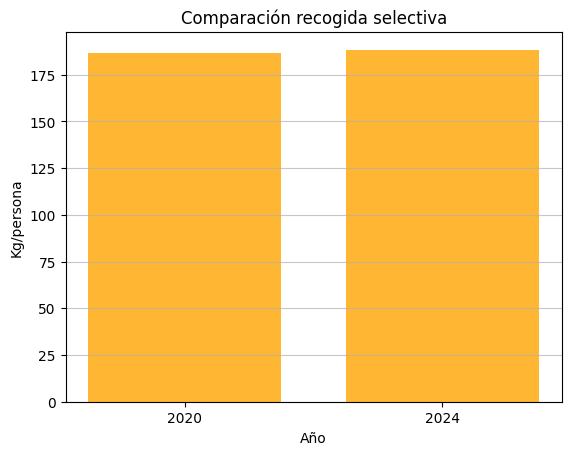

In [54]:
#Grafica comparativa de 10 años.
x=df_selectiva_agrupado["Año"]
plt.bar(df_selectiva_agrupado["Año"],df_selectiva_agrupado["Kg/persona"], width=3, color="Orange", alpha=0.8)
plt.xticks(x)
plt.title("Comparación recogida selectiva")
plt.ylabel("Kg/persona")
plt.xlabel("Año")
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show